In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_swiss_roll

In [5]:
def sample_batch(batch_size, device='cpu'):
    data, _ = make_swiss_roll(batch_size)
    data = data[:, [2, 0]] / 10
    data = data * np.array([1, -1])
    return torch.from_numpy(data).to(device)

In [6]:
class DiffusionModel():
    
    def __init__(self, T):
        # 3e-1 --> 0.3, 1e-5 --> 0.00001
        self.betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5
        self.alphas = 1 - self.betas
        self.alphas_bar = torch.cumprod(self.alphas, dim=0)
        
    def forward_diffusion(self, x0, t):
        t = t-1
        mu = torch.sqrt(self.alphas_bar[t]) * x0
        std = torch.sqrt(1 - self.alphas_bar[t])
        epsilon = torch.randn_like(x0)
        return mu + std * epsilon

In [11]:
x0 = sample_batch(3000)
model = DiffusionModel(40)
xT = model.forward_diffusion(x0, 20)

In [12]:
print(xT.mean())
print(xT.std())

tensor(-0.1034, dtype=torch.float64)
tensor(0.6837, dtype=torch.float64)


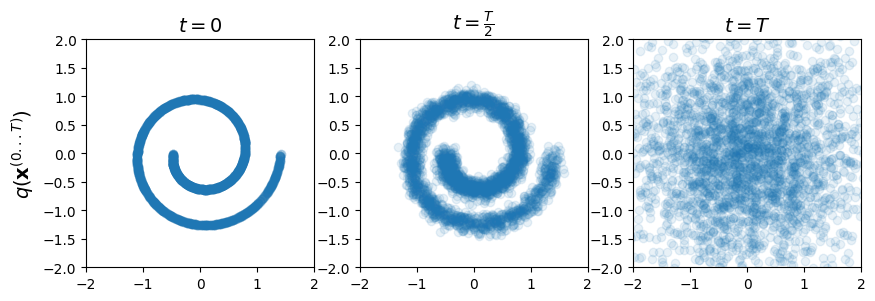

In [24]:
fontsize = 14
fig = plt.figure(figsize=(10, 3))

data = [x0, model.forward_diffusion(x0, 20), model.forward_diffusion(x0, 40)]
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(data[i][:, 0], data[i][:, -1], alpha=0.1)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.gca().set_aspect('equal') # Setting the aspect ratio to be equal for all 3 subplots.
    
    if i==0:
        plt.title('$t=0$', fontsize=fontsize)
        plt.ylabel(r'$q(\mathbf{x}^{(0...T)})$', fontsize=fontsize)
    if i==1: plt.title(r'$t=\frac{T}{2}$', fontsize=fontsize)
    if i==2: plt.title('$t=T$', fontsize=fontsize)

plt.savefig('forward_process.png', bbox_inches='tight')
plt.show()